# Support Vector Machines

### Generate Dataset

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np

In [2]:
X,Y = make_classification(n_classes=2,n_clusters_per_class=1,n_samples=400,n_features=2,random_state=3,n_informative=2,n_redundant=0)

In [3]:
print(Y)

[0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0]


In [4]:
# Convert Y labels into {1,-1}
Y[Y==0] = -1 # Broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

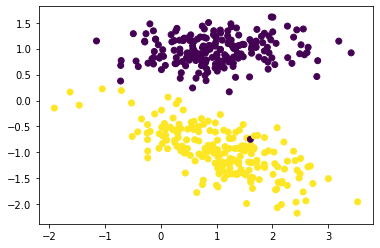

In [5]:

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses
    
    
                
                    
        

In [7]:
mySVM = SVM()
W,b,losses = mySVM.fit(X,Y,maxItr = 100)

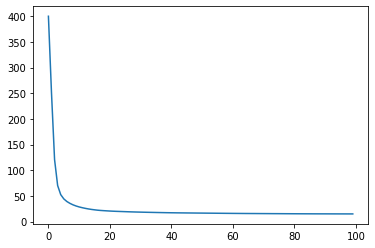

In [8]:
plt.plot(losses)

In [9]:
print(losses)

[400.0, 250.82938645032132, 120.79021145869072, 70.26725145038336, 52.548677909503134, 44.24279362806955, 39.12366327439809, 35.5064153032648, 32.64618734357072, 30.386734982941846, 28.5496145721539, 27.082395431975396, 25.77938328049648, 24.67230210090143, 23.722332499971046, 22.938270210146936, 22.218978572197123, 21.696379297835858, 21.287185178883394, 20.91566422414559, 20.553593493304714, 20.253773355070123, 19.991591302760213, 19.77784601685631, 19.561565846538723, 19.345970497899852, 19.131393913962842, 18.917524711210504, 18.742707353367535, 18.581773956741973, 18.425302164304675, 18.271914035183094, 18.131355737141742, 18.002344483639042, 17.87565440281208, 17.754799668106887, 17.634941591414645, 17.514300185074596, 17.39411643269723, 17.299748891822375, 17.202005556643883, 17.114151283173232, 17.02793294918952, 16.967394516468367, 16.9015566572747, 16.83737957196576, 16.77779654988252, 16.718445366986035, 16.659276626654787, 16.600396407402876, 16.54170206469324, 16.483242643

In [12]:
W,B = mySVM.W,mySVM.b
print(W,B)

[[-0.32392459 -2.03402829]] 0.3870000000000003


In [13]:
def plotHyperplane(w1,w2,b):
    
    
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2 # WT + B = 0
    
    x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
    x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
    
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

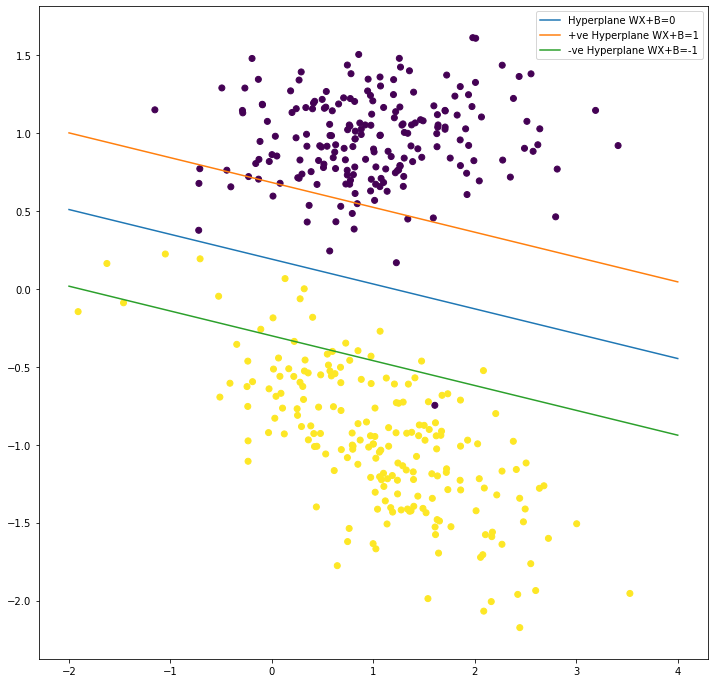

In [14]:
plotHyperplane(W[0,0],W[0,1],B)

## Visualising Support Vectors, Positive and Negative Hyperplanes

In [17]:
# Effect the changing 'C' - Penalty Constant
mySVM1 = SVM(1000)
W,b,losses = mySVM1.fit(X,Y,maxItr = 100)
W,B = mySVM1.W,mySVM1.b
print(W,B)

[[ -9.43573288 -35.99621175]] 6.0


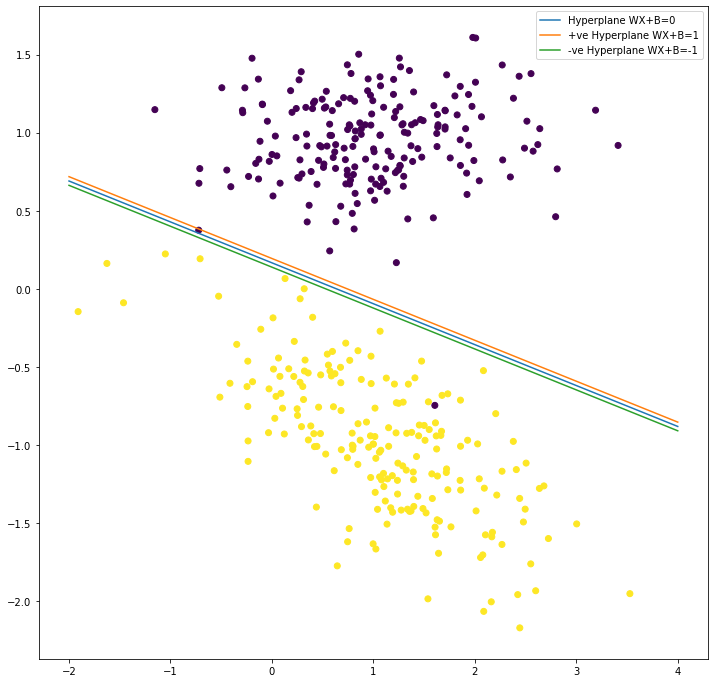

In [18]:
plotHyperplane(W[0,0],W[0,1],B)